<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S12_C2_CNN_Binary_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

[CNN](https://poloclub.github.io/cnn-explainer/)

In [1]:
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Parte 1. Cargar los datos

In [2]:
if(os.path.exists("pizza_steak")):
  print("Files already exist")
else:
  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

  zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
  zip_ref.extractall()
  zip_ref.close()
  !rm pizza_steak.zip

Files already exist


In [3]:
!ls pizza_steak/

test  train


# Parte 2. Inspeccionar los datos

In [4]:
!pip install utils

In [5]:
import pathlib
import numpy as np
import random

from utils import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [7]:
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


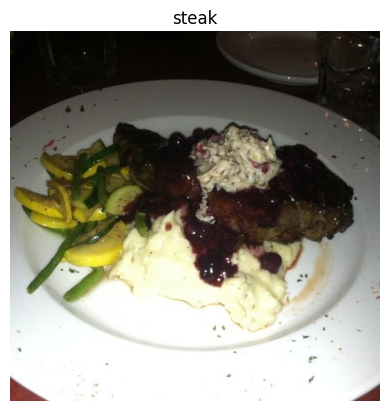

In [9]:
random_class = random.choice(class_names)
img = view_random_image(target_dir = "pizza_steak/train/", target_class=random_class)

In [10]:
# Results Dictionary
all_results = {
    "models" : ["model_1", "model_2", "model_3", "model_4"],
    "acc" : [],
    "loss" : [],
}

# Parte 3. Preprocesamiento

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [13]:
train_generator = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1/255.)

In [14]:
train_data = train_generator.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes cuadradas para poder usar Conv2D
    class_mode = "binary", # Clases binarias
    seed = 42, # Semilla que asegura la reproducibilidad
    batch_size = 32, # Tamaño del batch
    subset = "training" # Subconjunto de entrenamiento
)

valid_data = train_generator.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes
    class_mode = "binary", # Clases binarias
    batch_size = 32, # Tamaño del batch
    seed = 42, # Semilla
    shuffle = False, #
    subset = "validation" # Subconjunto de validación
)

test_data = train_generator.flow_from_directory(
    directory = test_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes
    class_mode = "binary", # Clases binarias
    seed = 42, # Semilla
    batch_size = 32, # Tamaño del batch
    shuffle = False
)

Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
images, labels = next(train_data)

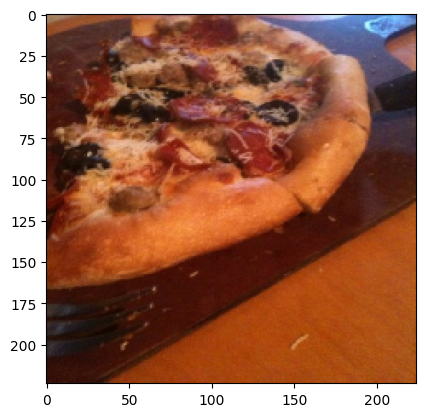

In [16]:
images[20].shape
plt.imshow(images[20])

# Parte 4.A. Crear el modelo 1

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [18]:
model_1 = Sequential([Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3), padding = 'valid', activation="relu"),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      Flatten(),
                      Dense(units=1, activation="sigmoid")])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 216, 216, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 466560)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         466,561 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 469,571 (1.79 MB)

 Trainable params: 469,571 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_1.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Parte 4.B. Entrenar el modelo 1

In [21]:
import numpy as np

In [22]:
batch_size = 32
history_1 = model_1.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=np.floor(len(train_data)//batch_size),  #floor(len(X_train)//batch_size)
                        validation_data=valid_data,
                        #validation_steps=np.floor(len(valid_data)//batch_size),
                        verbose = 1)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 351ms/step - accuracy: 0.5906 - loss: 0.7202 - val_accuracy: 0.7300 - val_loss: 0.5721
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8319 - loss: 0.3896 - val_accuracy: 0.7433 - val_loss: 0.5260
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.9194 - loss: 0.2778 - val_accuracy: 0.7633 - val_loss: 0.5258
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9707 - loss: 0.1007 - val_accuracy: 0.7433 - val_loss: 0.6609
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.9992 - loss: 0.0365 - val_accuracy: 0.7733 - val_loss: 0.8493
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.9873 - loss: 0.0384 - val_accuracy: 0.7000 - val_loss: 1.1045


In [23]:
1200/32 # El número de lotes

37.5

# Parte 4.C. Probar el modelo 1

In [27]:
scores_1  = model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8464 - loss: 0.4460


In [28]:
def plot_train_curves(history):
  plt.figure(figsize=(12,2))
  plt.subplot(1,2,1)
  plt.plot(history.history["accuracy"], label = "accuracy")
  plt.plot(history.history["val_accuracy"], label = "val_accuracy")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()


  plt.figure(figsize=(12,2))
  plt.subplot(1,2,1)
  plt.plot(history.history["loss"], label = "loss")
  plt.plot(history.history["val_loss"], label = "val_loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

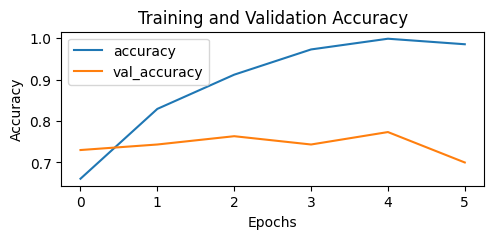

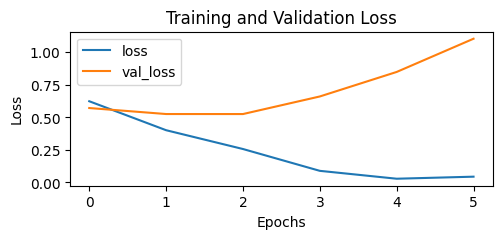

In [29]:
plot_train_curves(history_1)

* El rendimiento del entrenamiento es excelente es casi un accuracy de 100%
* El rendimiento del validacion es muy baja  al final es del 70%

Esto muestra que el modelo se sobreajustó (overfiting)

**Qué hacer para disminuir el sobreajuste**
* Aumentar los datos
* Regularización (pooling, dropout,)
* Disminuir la complejidad ( este caso tiene 4 capas convolucionaes secuencciales)


# Parte 5.A. Crear el modelo 2

In [31]:
model_2 = Sequential([Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3), padding = 'valid', activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units=1, activation="sigmoid")])

model_2.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Parte 5.B. Entrenar el modelo 2

In [32]:
batch_size = 32
history_2 = model_2.fit(train_data,
                        epochs=6,
                        validation_data=valid_data,
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.5808 - loss: 0.6724 - val_accuracy: 0.7267 - val_loss: 0.5531
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.7777 - loss: 0.4726 - val_accuracy: 0.7833 - val_loss: 0.5220
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8049 - loss: 0.4447 - val_accuracy: 0.7767 - val_loss: 0.4982
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.8251 - loss: 0.4027 - val_accuracy: 0.7667 - val_loss: 0.5119
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.8540 - loss: 0.3537 - val_accuracy: 0.7500 - val_loss: 0.5823
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8219 - loss: 0.3831 - val_accuracy: 0.7933 - val_loss: 0.4853


# Parte 5.C. Probar el modelo 2

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.8642 - loss: 0.3584


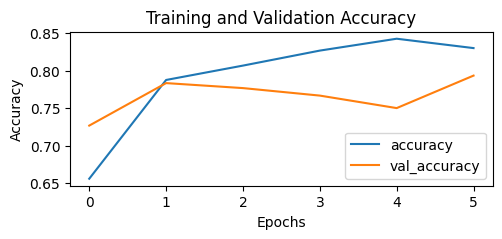

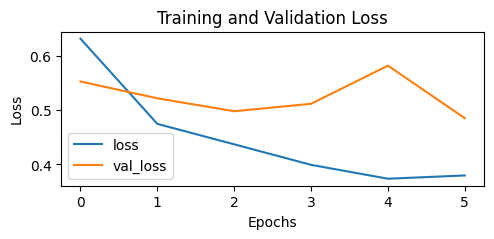

In [33]:
scores_2  = model_2.evaluate(test_data)
plot_train_curves(history_2)